In [1]:
import numpy as np 
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

$$y_{j} = g\left(\sum_{i = 0}^{m}w_{ij}x_{i}\right)=\begin{cases}1 &  g()>0\\b &  g() \leq 0\end{cases}$$

Activaton:
$$\sum_{i = 0}^{m}w_{ij}x_{i} =  WX$$


Updating the weights: 
$$ w_{ij} \rightarrow w_{ij}-\eta\left(y_{j}-t_{j}\right)x_{i} $$
$$W \rightarrow W - \eta X^{t}(Y-T)$$

In [97]:
class pcn:
    """ A basic Perceptron"""
    def __init__(self,inputs,targets):
        """ Constructor """
        if np.ndim(inputs)>1:
            self.nIn = np.shape(inputs)[1]
        else: 
            self.nIn = 1
        if np.ndim(targets)>1:
            self.nOut = np.shape(targets)[1]
        else:
            self.nOut = 1

        self.nData = np.shape(inputs)[0]
        # Initialise network
        self.weights = np.random.rand(self.nIn+1,self.nOut)*0.1-0.05
        
    def accuracy(targets,activations):
        acc = 0
        for a,b in zip(targets,activations):
            if a == b:
                acc += 1
        return 100*(acc/len(targets))    
        
    def pcnfwd(self,inputs):
        """ Run the network forward """
        # Compute activations
        activations =  np.dot(inputs,self.weights)

        # Threshold the activations
        return np.where(activations>0,1,0)        

    def pcntrain(self,inputs,targets,eta,nIterations,press = 75):
        """ Train the thing """	
        # Add the inputs that match the bias node
        inputs = np.concatenate((inputs,-np.ones([self.nData,1])),axis=1)
        # Training
        change = range(self.nData)

        for n in range(nIterations):
            self.activations = self.pcnfwd(inputs)
            self.weights -= eta*np.dot(np.transpose(inputs),self.activations-targets)
            acc = accuracy(targets,self.activations)
            
            
            print('Iteration:',n)
            print('Weights:''\n',self.weights)
            print('Results:''\n',self.activations)
            print('Accuracy:',acc,'%')
            print('       ')
            
            if acc >= press:
                break
            
            # Randomise order of inputs
            #np.random.shuffle(change)
            #inputs = inputs[change,:]
            #targets = targets[change,:]

        #return self.weights






Inputs logical OR:
$$I=\begin{bmatrix}0 & 0 \\0 & 0  \\1&0 \\1&1 \end{bmatrix}$$
Targets:
$$ T=\begin{bmatrix}0  \\1  \\1 \\1 \end{bmatrix}$$

In [22]:
I = [[0,0],[0,1],[1,0],[1,1]] #N+1xM(+1 by the bias) #Inputs
T = [[0],[1],[1],[1]]         #1XM  
#weight dimension = Inputs dim                       #Target

In [78]:
T1 = [[0],[1],[1],[1]]

In [79]:
def accuracy(targets, activation):
    acc = 0
    for a,b in zip(targets,activation):
        if a == b:
            acc += 1
    return 100*(acc/len(targets))

In [80]:
accuracy(T,T1)

100.0

In [13]:
np.concatenate((I,-np.ones([4,1])),axis = 1)

array([[ 0.,  0., -1.],
       [ 0.,  1., -1.],
       [ 1.,  0., -1.],
       [ 1.,  1., -1.]])

In [98]:
p = pcn(I,T)

In [99]:
p.pcntrain(I,T,0.25,6,press = 100)

Iteration: 0
Weights:
 [[ 0.47912467]
 [ 0.49569571]
 [-0.73545629]]
Results:
 [[0]
 [0]
 [0]
 [0]]
Accuracy: 25.0 %
       
Iteration: 1
Weights:
 [[ 0.47912467]
 [ 0.49569571]
 [-0.48545629]]
Results:
 [[1]
 [1]
 [1]
 [1]]
Accuracy: 75.0 %
       
Iteration: 2
Weights:
 [[ 0.47912467]
 [ 0.49569571]
 [-0.23545629]]
Results:
 [[1]
 [1]
 [1]
 [1]]
Accuracy: 75.0 %
       
Iteration: 3
Weights:
 [[0.47912467]
 [0.49569571]
 [0.01454371]]
Results:
 [[1]
 [1]
 [1]
 [1]]
Accuracy: 75.0 %
       
Iteration: 4
Weights:
 [[0.47912467]
 [0.49569571]
 [0.01454371]]
Results:
 [[0]
 [1]
 [1]
 [1]]
Accuracy: 100.0 %
       


In [100]:
####

Neurons :
1.- Linear: $$ y_{j} = \sum_{i} w_{ij}x_{i}$$
2.- Logistic:
3.- Softmax:

Chain Rule:
$$ \frac{\text{d}f\left(u(x)\right)}{\text{d}x} = \frac{\text{d}f\left(u(x)\right)}{\text{d}u(x)}\frac{\text{d}u(x)}{\text{d}x} $$

ACtivation function Sigmoid Function: $$ g(h) = \frac{1}{1+exp(-\beta h)}$$

Activation Function Soft Max:
$$ g(h_{k}) = \frac{exp(h_{k})}{\sum_{k=1}^{N}exp(h_{k})} $$

In [102]:
class mlp:
    """ A Multi-Layer Perceptron"""
    
    def __init__(self,inputs,targets,nhidden,beta=1,momentum=0.9,outtype='logistic'):
        # Set up network size
        self.ndata   = np.shape(inputs)[0]
        self.nin     = np.shape(inputs)[1]
        
        self.nout    = np.shape(targets)[1]
        self.nhidden = nhidden

        self.beta     = beta
        self.momentum = momentum
        self.outtype  = outtype
    
        # Initialise network
        self.weights1 = (np.random.rand(self.nin+1,self.nhidden)-0.5)*2/np.sqrt(self.nin)
        self.weights2 = (np.random.rand(self.nhidden+1,self.nout)-0.5)*2/np.sqrt(self.nhidden)

    def earlystopping(self,inputs,targets,valid,validtargets,eta,niterations=100):
    
        valid = np.concatenate((valid,-np.ones([np.shape(valid)[0],1])),axis=1)
        
        old_val_error1 = 100002
        old_val_error2 = 100001
        new_val_error  = 100000
        
        count = 0
        while (((old_val_error1 - new_val_error) > 0.001) or ((old_val_error2 - old_val_error1)>0.001)):
            count+=1
            print (count)
            self.mlptrain(inputs,targets,eta,niterations)
            old_val_error2 = old_val_error1
            old_val_error1 = new_val_error
            validout = self.mlpfwd(valid)
            new_val_error = 0.5*np.sum((validtargets-validout)**2)
            
        print ("Stopped", new_val_error,old_val_error1, old_val_error2)
        return new_val_error

    def mlptrain(self,inputs,targets,eta,niterations):
        """ Train the thing """    
        # Add the inputs that match the bias node
        inputs = np.concatenate((inputs,-np.ones((self.ndata,1))),axis=1)
        change = range(self.ndata)
    
        updatew1 = np.zeros((np.shape(self.weights1)))
        updatew2 = np.zeros((np.shape(self.weights2)))
            
        for n in range(niterations):
    
            self.outputs = self.mlpfwd(inputs)

            error = 0.5*np.sum((self.outputs-targets)**2)
            if (np.mod(n,100)==0):
                print ("Iteration: ",n, " Error: ",error)    

            # Different types of output neurons
            if self.outtype == 'linear':
                deltao = (self.outputs-targets)/self.ndata
            elif self.outtype == 'logistic':
                deltao = self.beta*(self.outputs-targets)*self.outputs*(1.0-self.outputs)
            elif self.outtype == 'softmax':
                deltao = (self.outputs-targets)*(self.outputs*(-self.outputs)+self.outputs)/self.ndata 
            else:
                print ("error")
            
            deltah = self.hidden*self.beta*(1.0-self.hidden)*(np.dot(deltao,np.transpose(self.weights2)))
                      
            updatew1 = eta*(np.dot(np.transpose(inputs),deltah[:,:-1])) + self.momentum*updatew1
            updatew2 = eta*(np.dot(np.transpose(self.hidden),deltao)) + self.momentum*updatew2
            self.weights1 -= updatew1
            self.weights2 -= updatew2
                
            # Randomise order of inputs (not necessary for matrix-based calculation)
            #np.random.shuffle(change)
            #inputs = inputs[change,:]
            #targets = targets[change,:]
            
    def mlpfwd(self,inputs):
        """ Run the network forward """

        self.hidden = np.dot(inputs,self.weights1);
        self.hidden = 1.0/(1.0+np.exp(-self.beta*self.hidden))
        self.hidden = np.concatenate((self.hidden,-np.ones((np.shape(inputs)[0],1))),axis=1)

        outputs = np.dot(self.hidden,self.weights2)

        # Different types of output neurons
        if self.outtype == 'linear':
            return outputs
        elif self.outtype == 'logistic':
            return 1.0/(1.0+np.exp(-self.beta*outputs))
        elif self.outtype == 'softmax':
            normalisers = np.sum(np.exp(outputs),axis=1)*np.ones((1,np.shape(outputs)[0]))
            return np.transpose(np.transpose(np.exp(outputs))/normalisers)
        else:
            print ("error")



In [120]:
x = np.linspace(0,1,40).reshape((1,40))

t = np.sin(2*np.pi*x) + np.cos(4*np.pi*x) + np.random.randn(40)*0.2
x = x.T
t = t.T


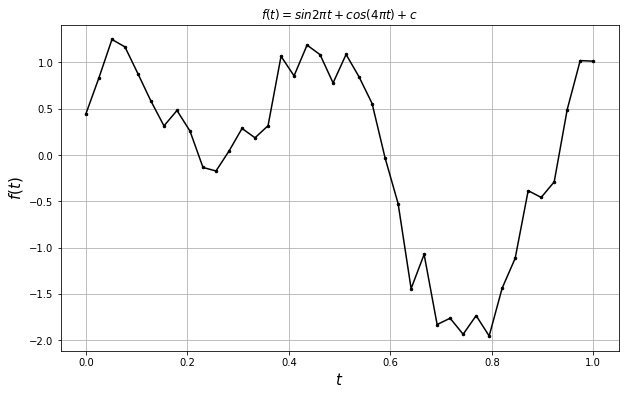

In [121]:
plt.figure(figsize = (10,6))
plt.plot(x,t,'.-',color = 'black',markersize = 5)
plt.title('$f(t) = sin2\pi t + cos(4\pi t)+c$')
plt.xlabel('$t$',fontsize = 15)
plt.ylabel('$f(t)$',fontsize = 15)
plt.grid(True)
plt.show()

In [122]:
train = x[0::2,:]
test = x[1::4,:]
valid = x[3::4,:]
traintarget = t[0::2,:]
testtarget = t[1::4,:]
validtarget = t[3::4,:]



In [125]:
net = mlp(train,traintarget,3,outtype='linear')
net.mlptrain(train,traintarget,0.25,101)


Iteration:  0  Error:  8.280880554764751
Iteration:  100  Error:  6.273256792625318
